# MULTIPLE LINEAR REGRESSION

In [1]:
## importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/home/ashish/projects/multipleLinearRegression/50_Startups.csv')
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
## Separating the dependent features and independent features

x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [4]:
x.head(2)

,R&D Spend,Administration,Marketing Spend,State
0,165349.2,136897.80,471784.10,New York
1,162597.7,151377.59,443898.53,California


In [5]:
y.head(2)

0    192261.83
1    191792.06
Name: Profit, dtype: float64

In [6]:
## label encoding
states = pd.get_dummies(x['State'],drop_first=True)

In [7]:
x = x.drop('State',axis=1)
x = pd.concat([x,states],axis=1)
x.head(2)

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.2,136897.80,471784.10,0,1
1,162597.7,151377.59,443898.53,0,0


In [8]:
## getting the training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [13]:
y_predicted = regression.predict(x_test)

/home/ashish/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

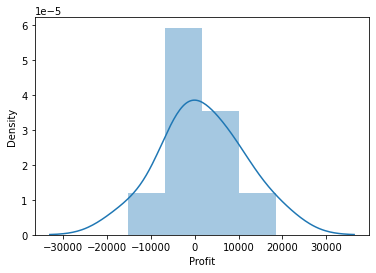

In [14]:
import seaborn as sns
sns.distplot(y_test-y_predicted)

In [17]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_predicted)
score

0.8987266414328637

## This::""
    R-squared score signifies that 89.87% of variation of the dependent variable profit is explained by the independent variables(R&D Spend,	Administration,	Marketing Spend, State) in our multiple regression  model.